In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Contours are simply a curve joining continuous points(along the boundary), having same color and intensity. Contours are useful for shape analysis and object dection and recognition.

- For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
- findContours function modifies the source image. So if you want source image even after finding contours, already store it to some other variables
- In OpenCV, finding a contour is like finding a white object from a black background. So, object to be found should be white and background should be black.

In [2]:
img = cv2.imread('images/binary.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [3]:
#contours

There are three arguments in cv2.findContours() function, first one is source image, second is contour retrieval mode, third is contour approximation method.  contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.

##### How to draw contours

To draw contours **cv2.drawContours()** is used. It can also be used to draw any shape provided you has boundary points. The function can also be used to draw any shape if provided with boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

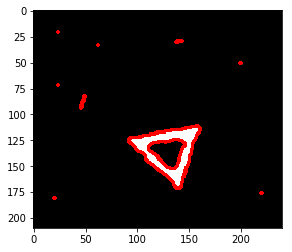

In [4]:
img_copy = img.copy()
cv2.drawContours(img_copy, contours, -1, (255, 0, 0), 2)
plt.imshow(img_copy);

To draw Individual contours:

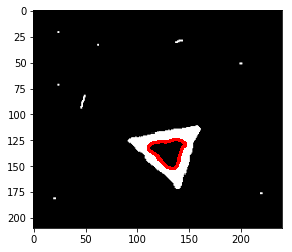

In [5]:
img_copy = img.copy()
cv2.drawContours(img_copy, contours, 3, (255, 0, 0), 2) #Draws fourth contour
plt.imshow(img_copy);

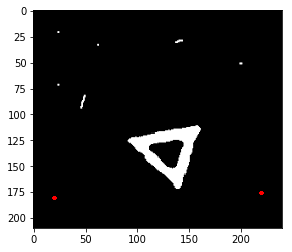

In [9]:
img_copy = img.copy()
cv2.drawContours(img_copy, [contours[0], contours[1]], -1, (255, 0, 0), 2) #Draws fourth contour
plt.imshow(img_copy);

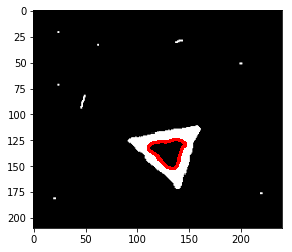

In [46]:
img_copy = img.copy()
cnt = contours[3]
cv2.drawContours(img_copy, [cnt], 0, (255, 0, 0), 2) #Draws fourth contour
plt.imshow(img_copy);

> Last two methods are same, but the seconds one is more useful.

##### Contour Approximation Method

Third arg of **cv2.findContours()**

We know that contours are the boundaries of a shape with same intensity. It stores (x,y) coordinates of the boundary of a shape. But does it store all the coordinates? That is specified by this contour approximation method. 

**cv2.CHAIN_APPROX_NONE** - all the boundary points are stored. But usually we don't need all the points. For instance, a contour of a stright line needs only two points.

**cv2.CHAIN_APPROX_SIMPLE** - removes all redundant points and compresses the contour, thereby saving memory.

In [79]:
def plot_subplot(img1, img2, title1, title2):
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.imshow(img1, 'gray')
    plt.title(title1)
    plt.xticks([])
    plt.yticks([]);

    plt.subplot(122)
    plt.imshow(img2, 'gray')
    plt.title(title2)
    plt.xticks([])
    plt.yticks([]);

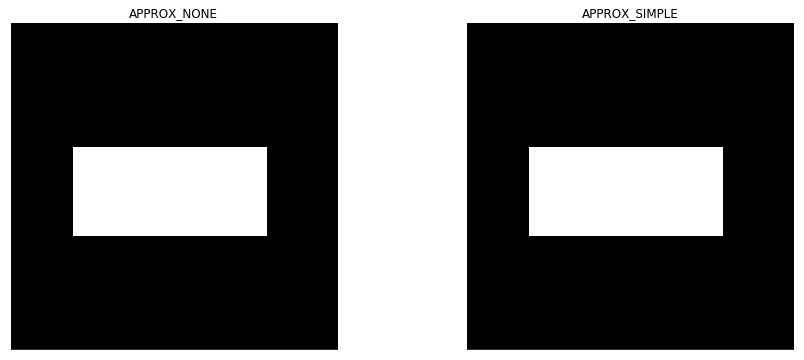

In [90]:
img = cv2.imread('images/binary_rect.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_thresh = cv2.threshold(img, 127, 255, 0)
image1, contours_none, hierarchy = cv2.findContours(img_thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
image2, contours_simple, hierarchy = cv2.findContours(img_thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img_c1 = img.copy()
img_c2 = img.copy()

cv2.drawContours(img_c1, contours_none, 0, (0, 0, 255), 15)
cv2.drawContours(img_c2, contours_simple, 0, (0, 0, 255), 15)

plot_subplot(img_c1, img_c2, 'APPROX_NONE', 'APPROX_SIMPLE')

### Contour Features

##### 1. Moments

Image moments help you calculate some features like center of mass of the object, area of the object etc. 

**cv2.moments()** gives a dictionary of all moment values.


In [94]:
cnt = contours_simple[0]
M = cv2.moments(cnt)
M

{'m00': 11700.0,
 'm10': 1275300.0,
 'm01': 1357200.0,
 'm20': 160945200.0,
 'm11': 147934800.0,
 'm02': 163367100.0,
 'm30': 22325401800.0,
 'm21': 18669643200.0,
 'm12': 17807013900.0,
 'm03': 20326784400.0,
 'mu20': 21937500.0,
 'mu11': 0.0,
 'mu02': 5931900.0,
 'mu30': 0.0,
 'mu21': 0.0,
 'mu12': 0.0,
 'mu03': 0.0,
 'nu20': 0.16025641025641024,
 'nu11': 0.0,
 'nu02': 0.04333333333333333,
 'nu30': 0.0,
 'nu21': 0.0,
 'nu12': 0.0,
 'nu03': 0.0}

From this moments, you can extract useful data like area, centroid etc. Centroid is given by the relations, C_x = M_{10}}/{M_{00}} and C_y = {M_{01}}/{M_{00}}. This can be done as follows:

In [95]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [98]:
cx, cy

(109, 116)

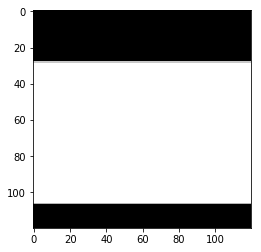

In [104]:
plt.imshow(img[cx-60:cx+60, cy-60:cy+60], 'gray');

##### 2. Contour Area


In [103]:
area = cv2.contourArea(cnt) #or M['moo']
area

11700.0

##### 3. Contour Perimeter

Also called Arc Length. Second argument specify whether shape is a closed contour (if passed True), or just a curve.



In [115]:
per = cv2.arcLength(cnt, True)
per

456.0

##### 4. checking Convexity

A function to check if a curve is convex or not, **cv2.isContourConvex**.

In [116]:
cv2.isContourConvex(cnt)

True

##### 5. Contour Approximation

It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify. It is an implementation of **Douglas-Peucker Algorithm**. 

Suppose we are trying to find a square in an image, but due to some problems in the image, we didn't get a perfect square, but a 'bad shape'.  We can use **cv2.approxPolyDP** function to approximate the shape. In this, second argument is called epsilon, which is maximum distance from contour to approximated contour. It is an accuracy parameter. A wise selection of epsilon is needed to get the correct output.

In [130]:
img = cv2.imread('images/binary_image.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)

image, contours, heir = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

epsilon = 0.01*cv2.arcLength(cnt,True)
eps2 = 0.1*cv2.arcLength(cnt,True)
approx1 = cv2.approxPolyDP(cnt,epsilon,True)
approx2 = cv2.approxPolyDP(cnt,eps2,True)

In [131]:
approx1


array([[[196, 176]],

       [[186, 180]],

       [[180, 186]],

       [[176, 196]],

       [[176, 204]],

       [[180, 214]],

       [[186, 220]],

       [[195, 224]],

       [[205, 224]],

       [[214, 220]],

       [[220, 214]],

       [[224, 205]],

       [[224, 195]],

       [[220, 186]],

       [[214, 180]],

       [[204, 176]]], dtype=int32)

In [132]:
approx2

array([[[196, 176]],

       [[176, 204]],

       [[205, 224]],

       [[224, 195]]], dtype=int32)

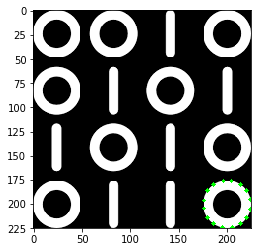

In [134]:
img_copy = img.copy()
plt.imshow(cv2.drawContours(img_copy, approx1, -1, (0, 255, 0), 3))

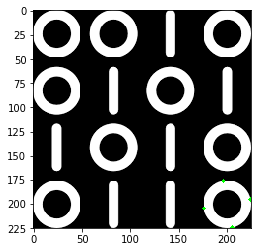

In [135]:
img_copy = img.copy()
plt.imshow(cv2.drawContours(img_copy, approx2, -1, (0, 255, 0), 3))

##### 6. Convex Hull

cv2.functions check a curve for convexity defects and corrects it. Convex curves are the curves which are alwaus bluged out, or at least flat. And if it is bulged inside, it is called convexity defects.

In [229]:
img = cv2.imread('images/Convex-Concave.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
im, contours, hierarchy =cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

In [189]:
hull = []

for i in range(len(contours)):
    hull.append(cv2.convexHull(contours[i], False))

In [190]:
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
color_contours = (0, 255, 0)
color = (255, 0, 0)
for i in range(len(contours)):
    cv2.drawContours(drawing, contours, i, color_contours, 5, 8, hierarchy)
    cv2.drawContours(drawing, hull, i, color, 5, 8)

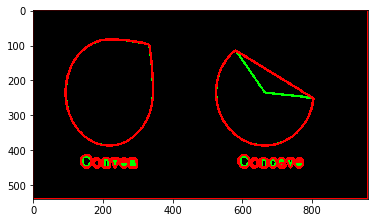

In [191]:
plt.imshow(drawing, 'gray')

##### 7. Bounding Rectangle

###### Straight Bounding Rectangle

Straight rectangle, which doesn't consider rotation of the object. So area of the bounding rectangel won't be minimum. Found using **cv2.boundingRect()**

In [195]:
cnt = contours[19]
red = (255, 0, 0)

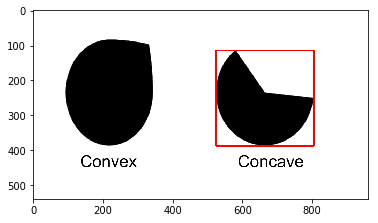

In [196]:
img_copy = img.copy()
x, y,w, h=  cv2.boundingRect(cnt)
cv2.rectangle(img_copy, (x, y), (x+w, y+h), red, 3)
plt.imshow(img_copy, 'gray')

###### Rotated Rectangle

bounding rectangle is drawn with minimum area, so it considers the rotation also. The function used is **cv2.minAreaRect()**. It returns a Box2D structure which contains following detals - ( center (x,y), (width, height), angle of rotation ). But to draw this rectangle, we need 4 corners of the rectangle. It is obtained by the function **cv2.boxPoints()**

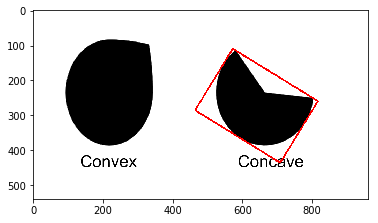

In [197]:
img_copy = img.copy()
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img_copy, [box], 0, red, 3)
plt.imshow(img_copy, 'gray')

###### 8. Minimum Enclosing Circle
we find the circumcircle of an object using the function cv2.minEnclosingCircle(). It is a circle which completely covers the object with minimum area.


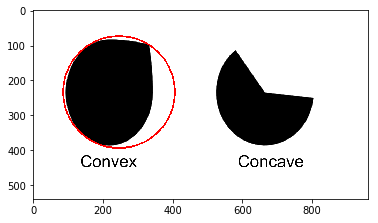

In [198]:
cnt = contours[20]
img_copy = img.copy()
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
cv2.circle(img_copy, center, radius, red, 4)
plt.imshow(img_copy, 'gray')

###### 9. Fitting an Ellipse

It returns the rotated rectangle in which the ellipse is inscribed.

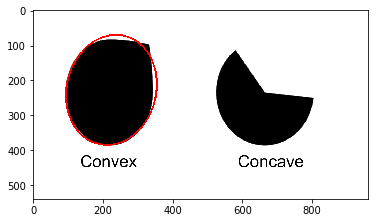

In [199]:
ellipse = cv2.fitEllipse(cnt)
img_copy = img.copy()
cv2.ellipse(img_copy,ellipse,red,4)
plt.imshow(img_copy, 'gray')

###### 10. Fitting a Line

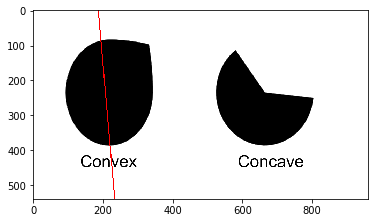

In [200]:
rows,cols = img.shape[:2]
img_copy = img.copy()
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv2.line(img_copy,(cols-1,righty),(0,lefty),red,2)
plt.imshow(img_copy)


### Contour Properties

Properties of objects like solidity, equivalent diameter, mask image, mean intensity etc.

##### 1. Aspect Ratio

aspect ratio = width/height

In [201]:
cnt = contours[20]
x, y, w, h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

0.8256578947368421

##### 2. Extent

Ratio of contour area to bounding rectangle area

Extent = object area/ bouding rectangle area)

In [203]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = area/rect_area
extent

0.8152652547703921

##### 3. Solidity

ratio of contour area to its convex hull area

Solidity = (contour area/ convex hull area)

In [206]:
cnt = contours[19]
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = area/hull_area
solidity

0.8436540146426449

##### 4. Equivalent Diameter

The diameter of the circle whose area is same as the contour area.

Equivalent Diameter = Square_root(4*contour area/pi)

In [207]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

230.93762103720078

#### 5. Orientation

The angle at which object is directed.


In [208]:
(x, y), (MA, ma), angle = cv2.fitEllipse(cnt) #also returns the major and minor axis
angle

122.69851684570312

##### 6. Mask and Pixel Points

In some case, we might need all the points that comprises an object.


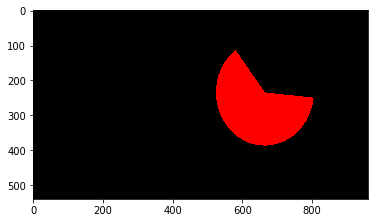

In [234]:
mask = np.zeros(img.shape, np.uint8)
cv2.drawContours(mask, [cnt],0, 255, -1)
pixelpoints = np.transpose(np.nonzero(mask))
# pixelpoints = cv2.findNonZero(mask)
plt.imshow(mask)

##### 7. Maximum Value, Minimum Value and their locations

In [242]:
mask = np.zeros(img.shape, np.uint8)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img, mask = mask)

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\core\src\minmax.cpp:753: error: (-215) (cn == 1 && (_mask.empty() || _mask.type() == 0)) || (cn > 1 && _mask.empty() && !minIdx && !maxIdx) in function cv::minMaxIdx


##### 8. Mean Color or Mean Intensity

We can find the average color of an object. Or it can be average intensity of the object in grayscale mode.

In [243]:
img = cv2.imread('images/scenic.jpg')
mask = np.zeros(img.shape[:2], np.uint8)
mean_val = cv2.mean(img,mask = mask)
mean_val

(0.0, 0.0, 0.0, 0.0)

##### 9. Extreme Points

In [246]:
img = cv2.imread('images/Convex-Concave.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
im, contours, hierarchy =cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
cnt = contours[20]

In [247]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

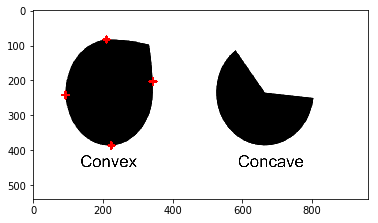

In [250]:
cv2.drawMarker(img, leftmost, color = (255, 0, 0),  thickness = 5)
cv2.drawMarker(img, rightmost, color = (255, 0, 0),  thickness = 5)
cv2.drawMarker(img, topmost, color = (255, 0, 0),  thickness = 5)
cv2.drawMarker(img, bottommost, color = (255, 0, 0),  thickness = 5)
plt.imshow(img)

### Contour functions

##### 1. Convexity Defects

Any deviation of the object in a convex hull can be considered as convexity defect. 

In [263]:
cnt = contours[19]
hull = cv2.convexHull(cnt, returnPoints = False)
defects = cv2.convexityDefects(cnt, hull)

> We have to pass returnPoints = Fasle while finding convex hull in order to find convexity defects.

It returns an array where each row contains these values - **[start point, end point, farthest point, approximate distance to farthest point]**. We can visualize it using the image. We draw a line joining start point and end point, then draw a circle at the farthest points. First three values returned are indices of cnt. So we an bring those values from cnt.

In [271]:
for i in range(defects.shape[0]):
    s, e, f, d = defects[i, 0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img, start, end, [0, 255, 0], 3)
    cv2.circle(img, far, 5, [0, 0, 255], -1)
    
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [272]:
defects.shape

(55, 1, 4)

In [278]:
defects[0, 0]

array([109, 111, 110, 217], dtype=int32)

In [280]:
s, e, f, d = defects[0, 0]
start = tuple(cnt[s][0])
end = tuple(cnt[e][0])
far = tuple(cnt[f][0])
print(start, end, far)

(803, 254) (802, 261) (802, 255)


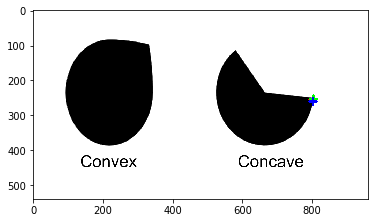

In [283]:
img = cv2.imread('images/Convex-Concave.png')
cv2.drawMarker(img, far, color = (255, 0, 0),  thickness = 5)
cv2.drawMarker(img, start, color = (0, 255, 0),  thickness = 5)
cv2.drawMarker(img, end, color = (0, 0, 255),  thickness = 5)
plt.imshow(img)

##### 2. Point Polygon Test

This function finds the shortest distance between a point in the image and a contour. It returns the distance which is negative when point is outside the contour, positive when point is inside and zero if point is on the contour.

In [284]:
dist = cv2.pointPolygonTest(cnt, (50, 50), True)
dist

-500.1299831043926

In the function, third argument is measureDist. If it is True, it finds the signed distance. If False, it finds whether the point is inside or outside or on the contour (it returns +1, -1, 0 respectively).

>  If you don’t want to find the distance, make sure third argument is False, because, it is a time consuming process. So, making it False gives about 2-3X speedup.

##### 3. Match Shapes

OpenCV comes with a function cv2.matchShapes() which enables us to compare two shapes, or two contours and returns a metric showing the similarity. The lower the result, the better match it is. It is calculated based on the hu-moment values.

In [287]:
cnt1 = contours[20]
cnt2 = contours[19]

cv2.matchShapes(cnt1,cnt2, 1, 0.0)

0.42866030235166264

In [302]:
from itertools import permutations

In [365]:
%%time
img = cv2.imread('images/Convex-Concave.png')
cnt = contours[19]

mask = np.zeros(img.shape, np.uint8)
l = []
for x in range(img.shape[1]):
    for y in range(img.shape[0]):
        dist = cv2.pointPolygonTest(cnt, (x, y), False)
        l.append(dist)
        if dist == -1.0:
            cv2.drawMarker(mask, (x, y), markerType = 0, color = (0, 0, 255), thickness = 5)
        elif dist == 1.0:
            cv2.drawMarker(mask, (x, y), markerType = 1, color = (255, 0, 0), thickness = 5)
        if  dist == 0.0:
            cv2.drawMarker(mask, (x, y), markerType = 2, color = (0, 255, 0), thickness = 8)
            
cv2.imshow('img',mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

Wall time: 7.42 s


### Contours Hierarcy

We use **cv2.findContours** function to detect objects in an image. Sometimes objects are in diferent locatoins. But in some cases, some shapes are inside other shapes. Just like nested figures. In this case, we call outer one as parent and inner one as child. This way, contours in an image have some relationship to each other. And we can specify how one contour is connected to each other, like, if it is a child of some other other contour or parent. This representation is Hierarchy.

##### Hierarchy Representation in OpenCV

So each contour has its own information regarding what hierarchy it is, who is its child, who is its parent etc. OpenCV represents it as an array of four values : **[Next, Previous, First_Child, Parent]**

> Next denotes next contour at the same hierarchical level.

> Previous denotes previous contour at the same hierarchical level.

> First_Child denotes its first child contour.

> Parent denotes index of its parent contour.


### Contour Retrieval Mode

##### 1. RETR_LIST

It simply retrieves all the contours, but doesn’t create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.

So here, 3rd and 4th term in hierarchy array is always -1. But obviously, Next and Previous terms will have their corresponding values.

This is the good choice to use in your code, if you are not using any hierarchy features.

\> hierarchy

    array([[[ 1, -1, -1, -1],
            [ 2,  0, -1, -1],
            [ 3,  1, -1, -1],
            [ 4,  2, -1, -1],
            [ 5,  3, -1, -1]]])

##### 2. RETR_EXTERNAL

If you use this flag, it returns only extreme outer flags. All child contours are left behind. We can say, under this law, Only the eldest in every family is taken care of. It doesn’t care about other members of the family.

You can use this flag if you want to extract only the outer contours. It might be useful in some cases.

\> hierarchy

    array([[[ 1, -1, -1, -1],
            [ 2,  0, -1, -1],
            [-1,  1, -1, -1]]])

##### 3. RETR_CCOMP

This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.

Just consider the image of a “big white zero” on a black background. Outer circle of zero belongs to first hierarchy, and inner circle of zero belongs to second hierarchy.

##### 4. RETR_TREE

It retrieves all the contours and creates a full family hierarchy list.

\> hierarchy

    array([[[ 7, -1,  1, -1],
            [-1, -1,  2,  0],
            [-1, -1,  3,  1],
            [-1, -1,  4,  2],
            [-1, -1,  5,  3],
            [ 6, -1, -1,  4],
            [-1,  5, -1,  4],
            [ 8,  0, -1, -1],
            [-1,  7, -1, -1]]])